In [256]:
# import basic packages for data preprocessing and analysis 
import pandas as pd 
pd.set_option("display.max.columns",None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [257]:
# load dataset in notebook 
data=pd.read_csv("loan_data.csv")

In [258]:
# first five rows of dataset
data.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


In [259]:
# Total records and features in dataset 
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 9000
Total features in dataset: 14


In [260]:
# dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            9000 non-null   object
 1   Name                  9000 non-null   object
 2   Age                   9000 non-null   int64 
 3   Gender                9000 non-null   object
 4   MaritalStatus         9000 non-null   object
 5   EducationLevel        9000 non-null   object
 6   EmploymentStatus      9000 non-null   object
 7   AnnualIncome          9000 non-null   int64 
 8   LoanAmountRequested   9000 non-null   int64 
 9   PurposeOfLoan         9000 non-null   object
 10  CreditScore           9000 non-null   int64 
 11  ExistingLoansCount    9000 non-null   int64 
 12  LatePaymentsLastYear  9000 non-null   int64 
 13  LoanApproved          9000 non-null   object
dtypes: int64(6), object(8)
memory usage: 984.5+ KB


In [261]:
# checking unique values in dataset
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'CustomerID': array(['bdd640fb-0667-4ad1-9c80-317fa3b1799d',
        '23b8c1e9-3924-46de-beb1-3b9046685257',
        'bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9', ...,
        '8a4f48b2-d251-43ad-880b-dbd7657050ee',
        '8d5af123-085d-47e6-872c-5869d4c933f2',
        'f3151b0a-fd13-4ac5-a6cf-af54ca9dc28c'], dtype=object),
 'Name': array(['Michelle Prince', 'Diana Mullins', 'Brittany Ballard', ...,
        'Veronica Avila', 'Kayla Miller', 'Jackie Carter'], dtype=object),
 'Age': array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
        47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
        31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49,
        63], dtype=int64),
 'Gender': array(['Male', 'Female'], dtype=object),
 'MaritalStatus': array(['Divorced', 'Married', 'Single', 'Widowed'], dtype=object),
 'EducationLevel': array(['Other', 'Bachelor', 'High School', 'PhD', 'Master'], dtype=object),
 'EmploymentStatus': array(['Em

In [262]:
# checking for null values in dataset 
data.isnull().sum()

CustomerID              0
Name                    0
Age                     0
Gender                  0
MaritalStatus           0
EducationLevel          0
EmploymentStatus        0
AnnualIncome            0
LoanAmountRequested     0
PurposeOfLoan           0
CreditScore             0
ExistingLoansCount      0
LatePaymentsLastYear    0
LoanApproved            0
dtype: int64

In [263]:
# checking for duplicated data
data.duplicated().sum()

0

In [ ]:
# replaced (Divorced,Single,Single) categories from MaritalStatus to "Non-Married" for ease of analysis
data["MaritalStatus"]=data["MaritalStatus"].replace({"Divorced":"Non-Married",
                                                     "Single":"Non-Married",
                                                     "Widowed":"Non-Married"})

In [265]:
# drop irrelavent features for predictive model
data.drop(["CustomerID","Name"],axis=1,inplace=True)

In [266]:
data.head()

,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,56,Male,Non-Married,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,46,Female,Non-Married,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


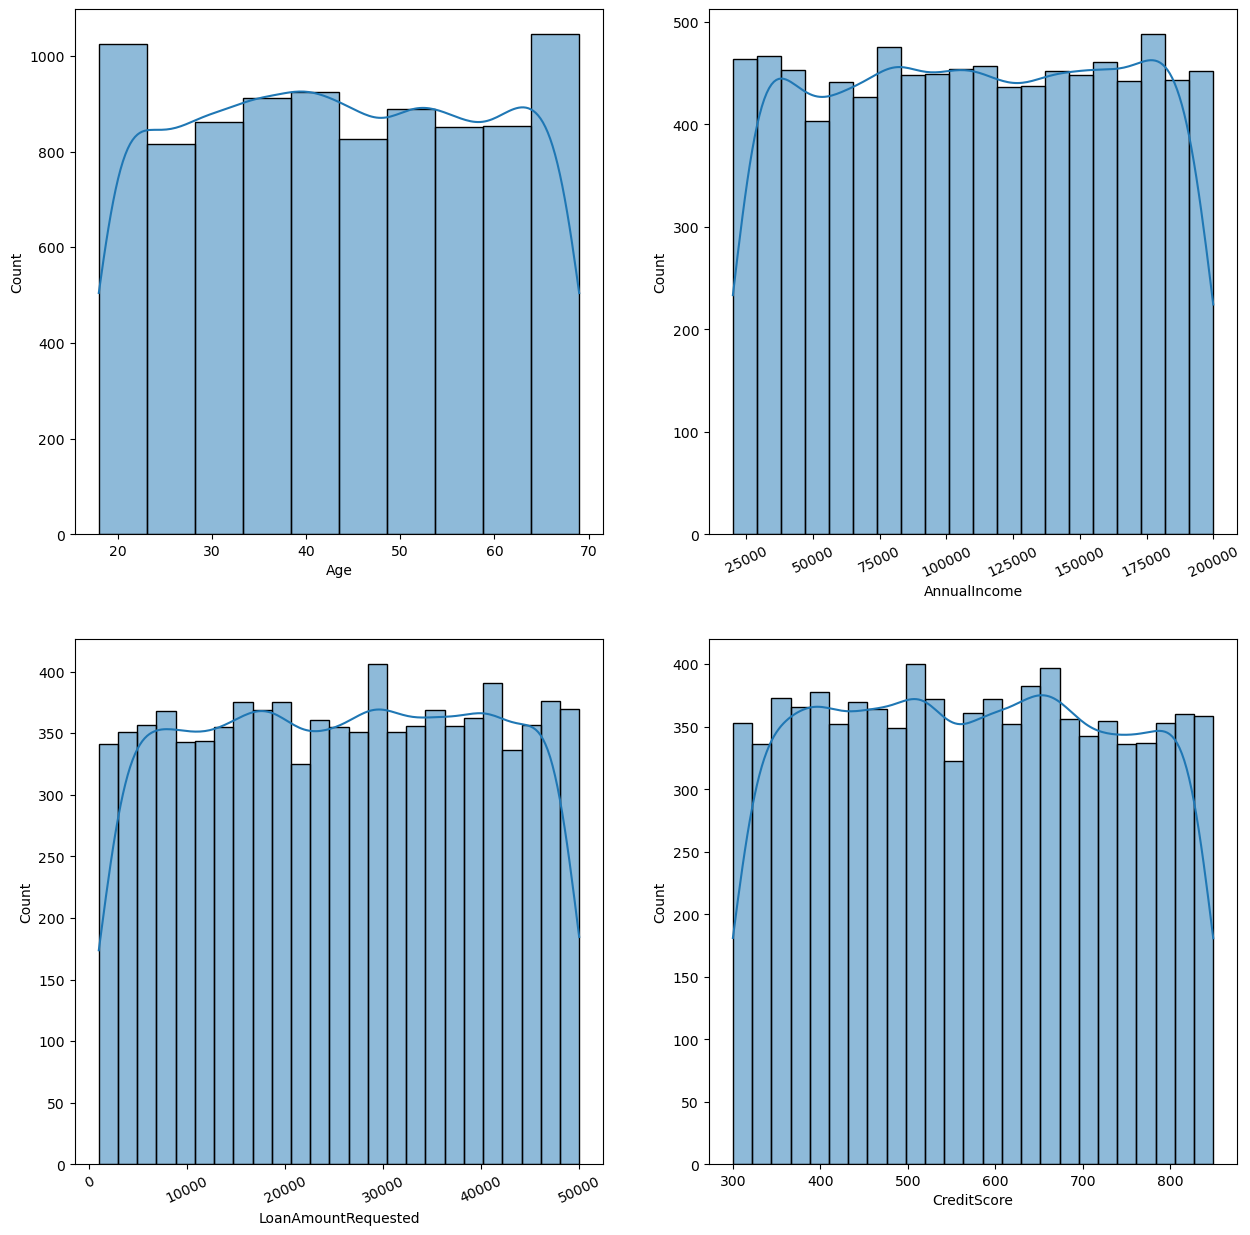

In [267]:
# univariate analysis for numerical data
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.histplot(data["Age"],kde=True,bins=10)
plt.subplot(2,2,2)
sns.histplot(data["AnnualIncome"],kde=True,bins=20)
plt.xticks(rotation=25)
plt.subplot(2,2,3)
sns.histplot(data["LoanAmountRequested"],kde=True,bins=25)
plt.xticks(rotation=25)
plt.subplot(2,2,4)
sns.histplot(data["CreditScore"],kde=True,bins=25)
plt.show()

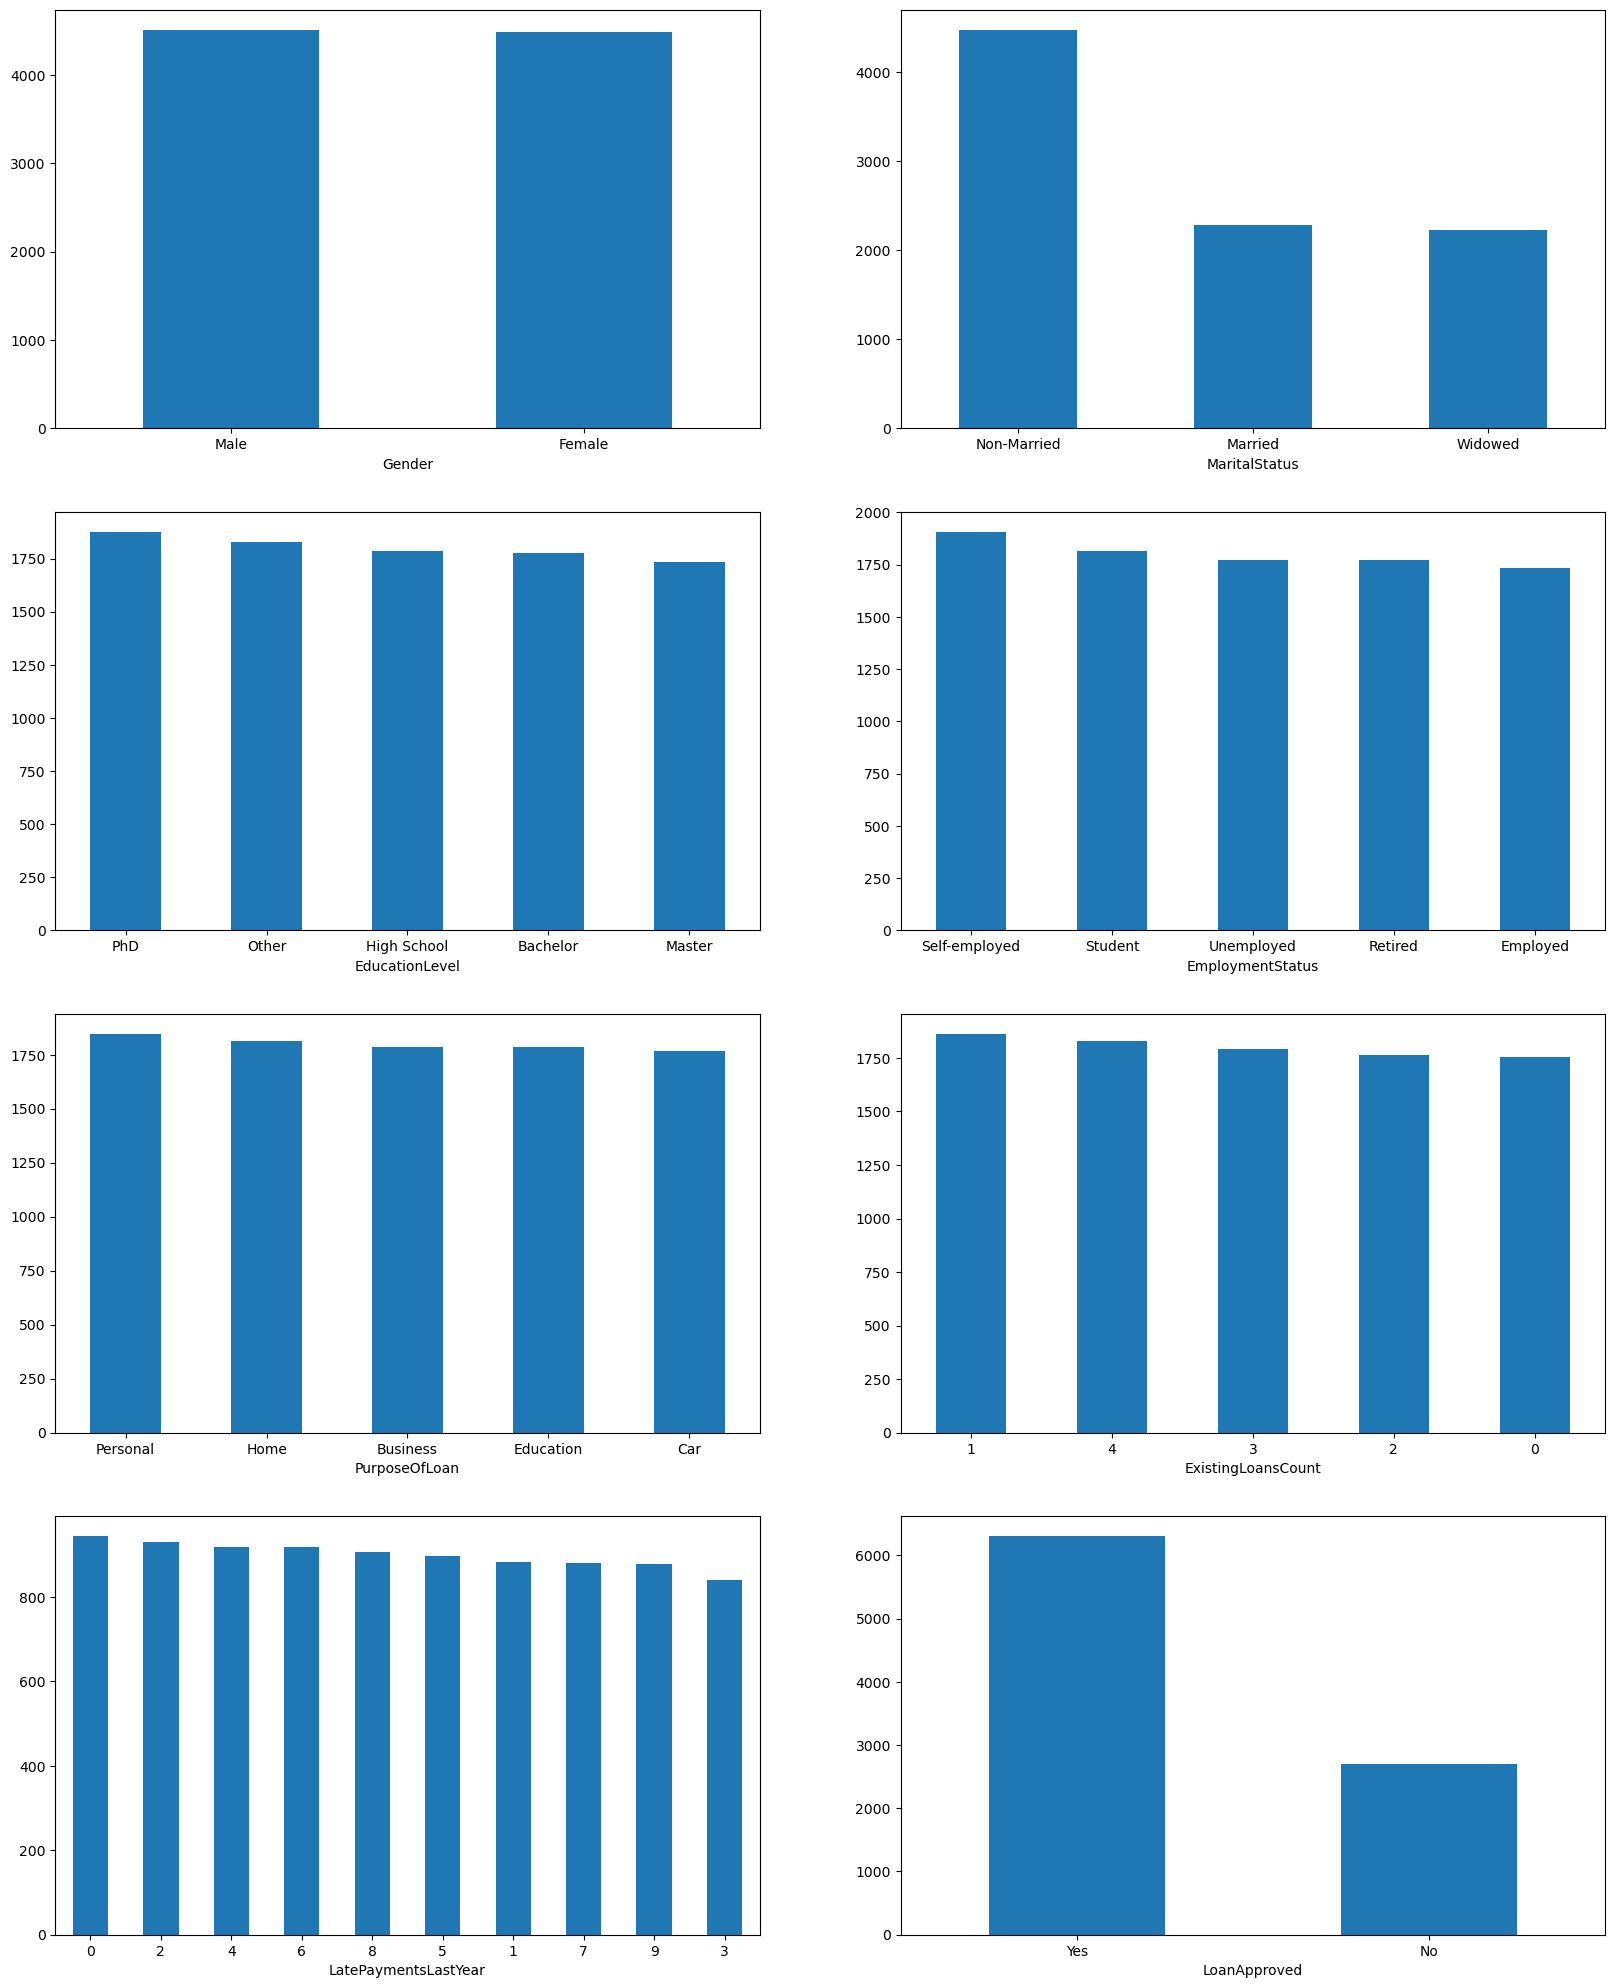

In [268]:
# categorical data analysis 
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
data["Gender"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(4,2,2)
data["MaritalStatus"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(4,2,3)
data["EducationLevel"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(4,2,4)
data["EmploymentStatus"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(4,2,5)
data["PurposeOfLoan"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(4,2,6)
data["ExistingLoansCount"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(4,2,7)
data["LatePaymentsLastYear"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(4,2,8)
data["LoanApproved"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()


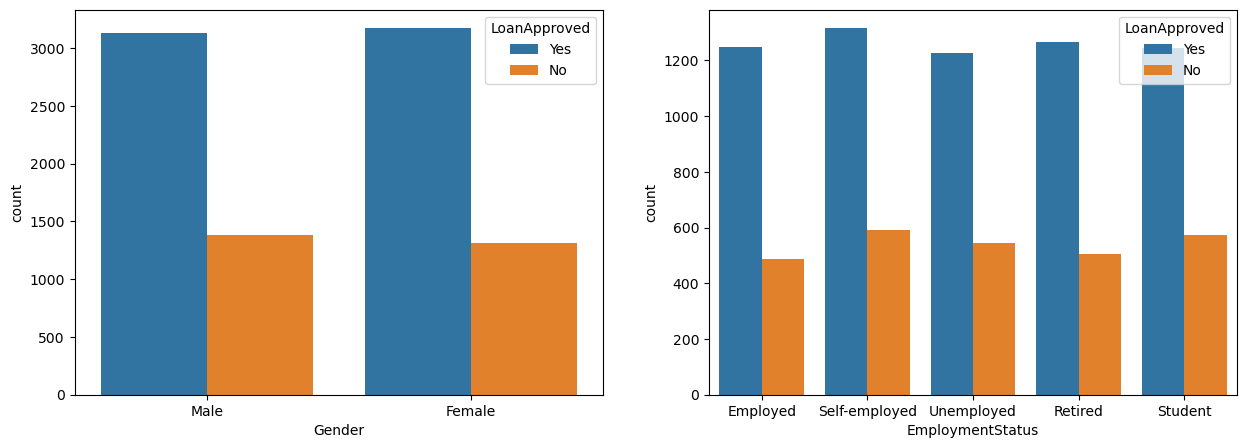

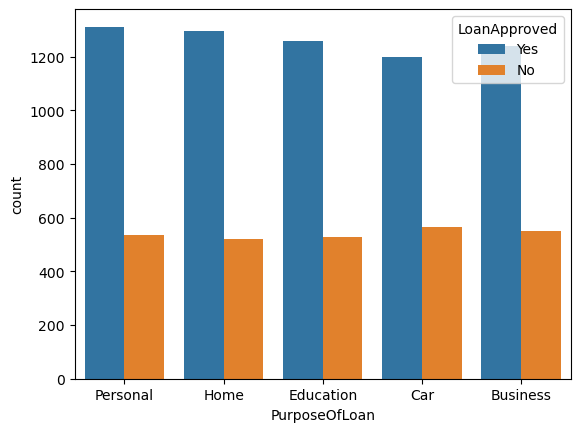

In [269]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x=data["Gender"],hue=data["LoanApproved"])
plt.subplot(1,2,2)
sns.countplot(data=data,x=data["EmploymentStatus"],hue=data["LoanApproved"])
plt.show()
sns.countplot(data=data,x=data["PurposeOfLoan"],hue=data["LoanApproved"])
plt.show()

In [270]:
from sklearn.preprocessing import LabelEncoder
gender_encoder=LabelEncoder()
MaritalStatus_encoder=LabelEncoder()
LoanApproved_encoder=LabelEncoder()

data["Gender"]=data[["Gender"]].apply(gender_encoder.fit_transform)
data["MaritalStatus"]=data[["MaritalStatus"]].apply(MaritalStatus_encoder.fit_transform)
data["LoanApproved"]=data[["LoanApproved"]].apply(LoanApproved_encoder.fit_transform)

data.head()

,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,56,1,1,Other,Employed,97622,46413,Personal,500,2,4,1
1,69,1,0,Bachelor,Employed,96925,24065,Home,532,2,0,1
2,46,0,1,High School,Self-employed,167927,46676,Personal,795,2,6,1
3,32,0,2,PhD,Unemployed,112920,27406,Education,376,2,9,0
4,60,0,2,Master,Unemployed,152183,49337,Car,517,3,7,0


In [271]:
from sklearn.preprocessing import OneHotEncoder 
Education_encode=OneHotEncoder(sparse_output=False)
Employment_encode=OneHotEncoder(sparse_output=False)
Purpose_encode=OneHotEncoder(sparse_output=False)

data=pd.concat([data.drop(["EducationLevel"],axis=1),pd.DataFrame(Education_encode.fit_transform(data[["EducationLevel"]]),columns=Education_encode.get_feature_names_out())],axis=1)
data=pd.concat([data.drop(["EmploymentStatus"],axis=1),pd.DataFrame(Employment_encode.fit_transform(data[["EmploymentStatus"]]),columns=Employment_encode.get_feature_names_out())],axis=1)
data=pd.concat([data.drop(["PurposeOfLoan"],axis=1),pd.DataFrame(Purpose_encode.fit_transform(data[["PurposeOfLoan"]]),columns=Purpose_encode.get_feature_names_out())],axis=1)

data.head()

,Age,Gender,MaritalStatus,AnnualIncome,LoanAmountRequested,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved,EducationLevel_Bachelor,EducationLevel_High School,EducationLevel_Master,EducationLevel_Other,EducationLevel_PhD,EmploymentStatus_Employed,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Student,EmploymentStatus_Unemployed,PurposeOfLoan_Business,PurposeOfLoan_Car,PurposeOfLoan_Education,PurposeOfLoan_Home,PurposeOfLoan_Personal
0,56,1,1,97622,46413,500,2,4,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,69,1,0,96925,24065,532,2,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,46,0,1,167927,46676,795,2,6,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,0,2,112920,27406,376,2,9,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,60,0,2,152183,49337,517,3,7,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


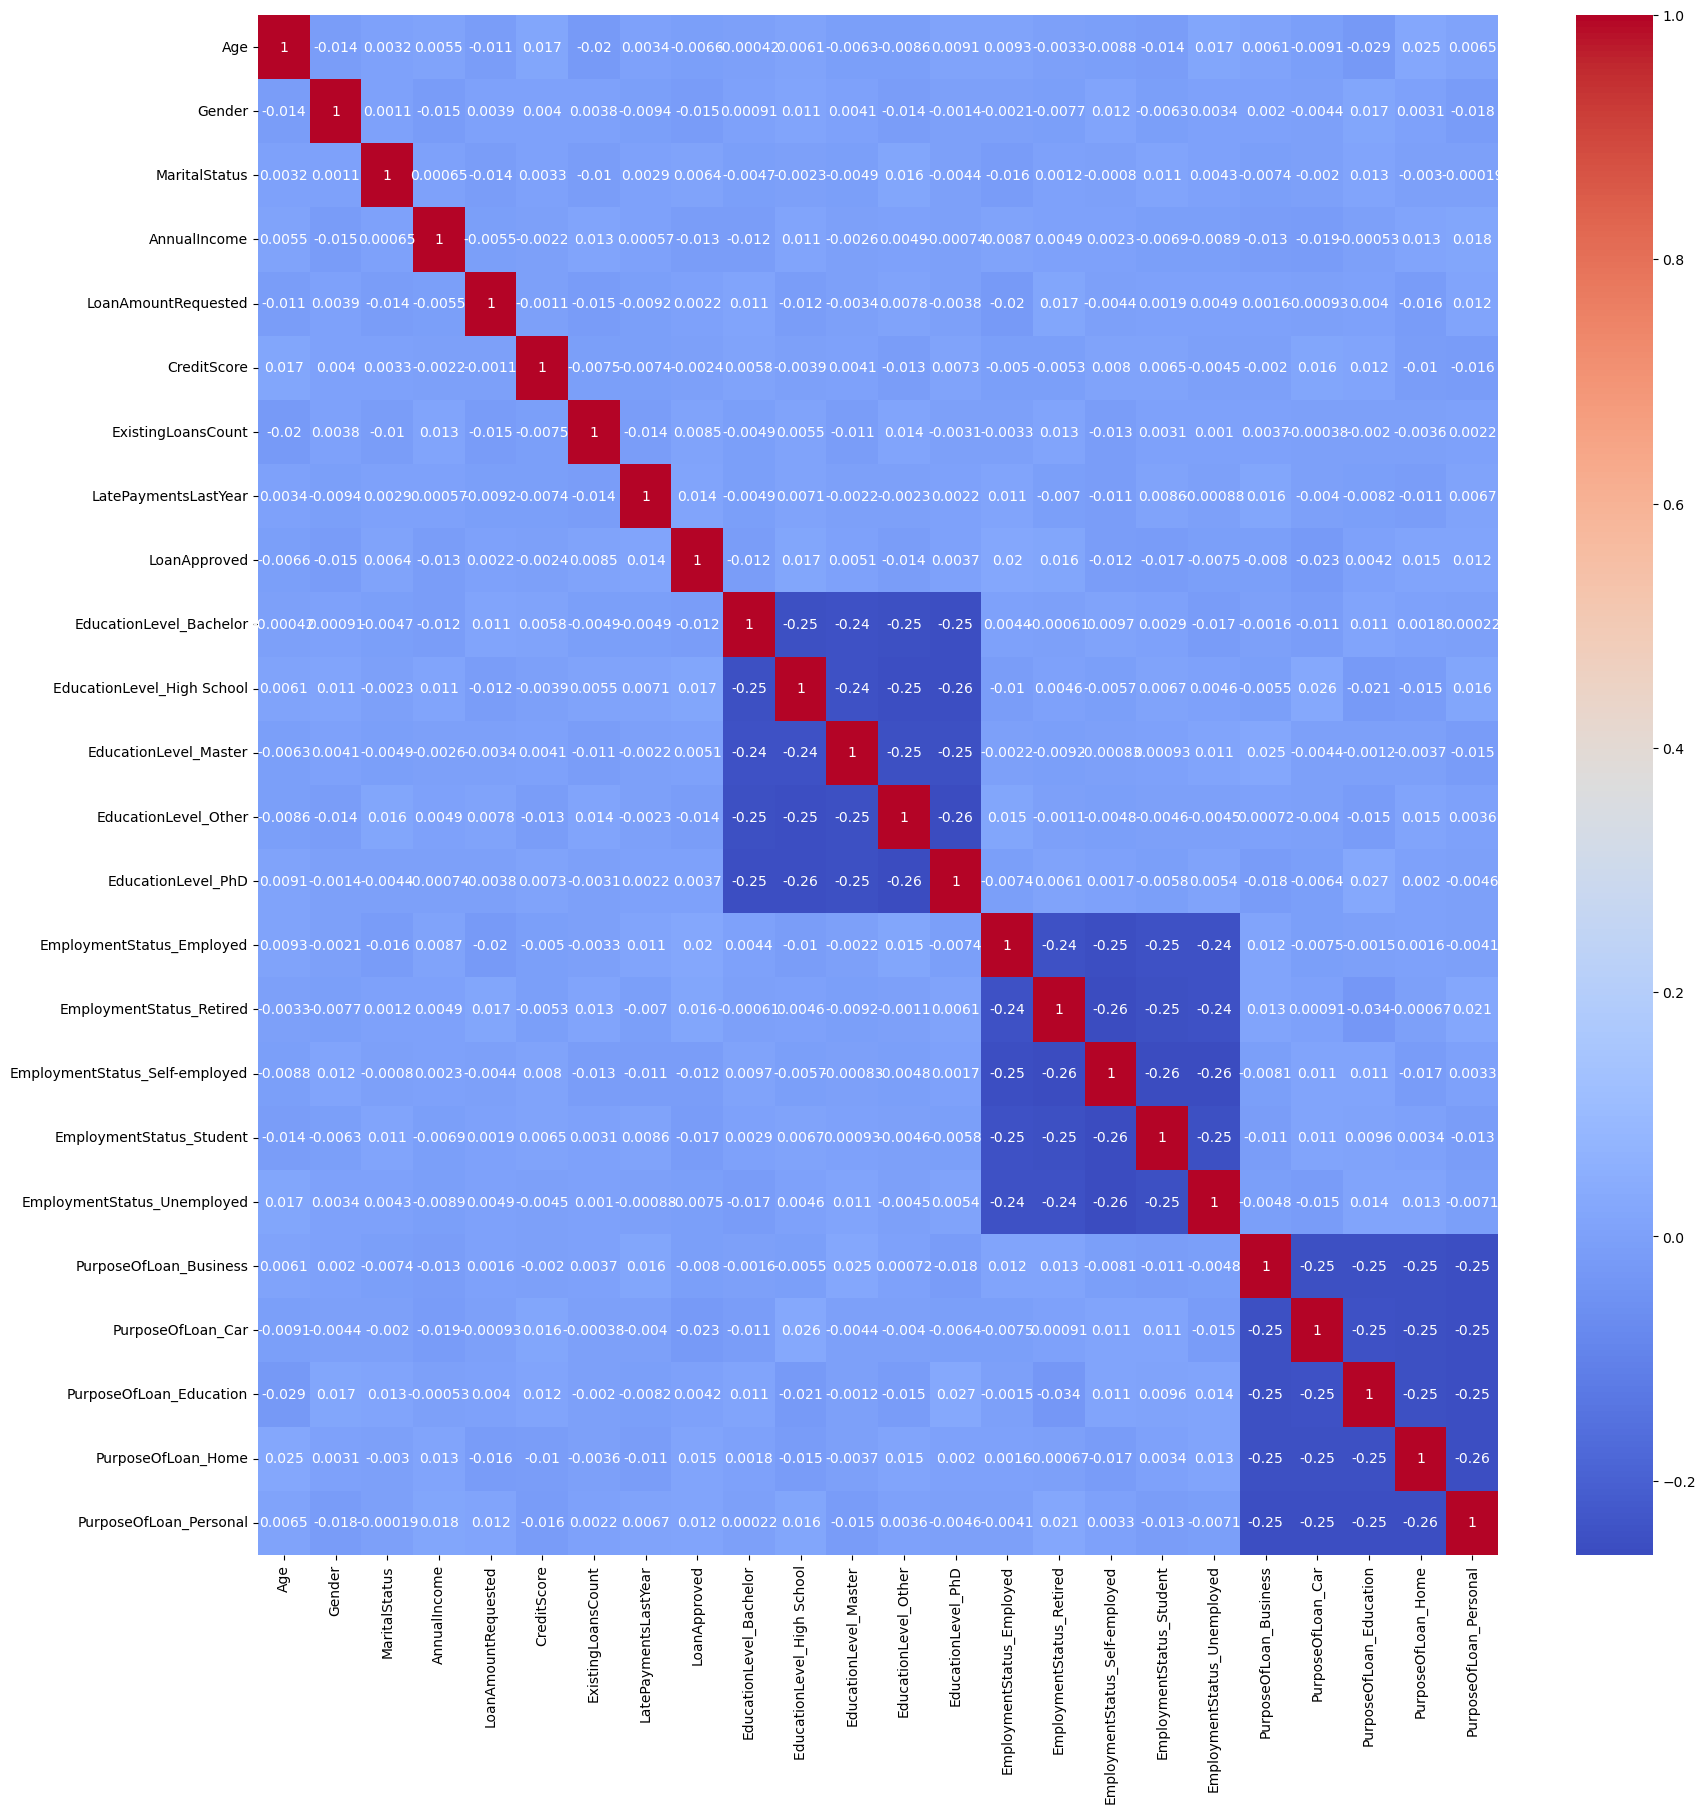

In [272]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [273]:
x=data.drop(["LoanApproved"],axis=1)
y=data["LoanApproved"]

In [274]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [275]:
print("train_x shape:",train_x.shape)
print("train_y shape:",train_y.shape)
print("test_x shape:",test_x.shape)
print("test_y shape:",test_y.shape)

train_x shape: (7200, 23)
train_y shape: (7200,)
test_x shape: (1800, 23)
test_y shape: (1800,)


In [276]:
train_y.value_counts()

LoanApproved
1    5052
0    2148
Name: count, dtype: int64

In [277]:
from imblearn.over_sampling import SMOTE
sampling=SMOTE()

train_x,train_y=sampling.fit_resample(train_x,train_y)

In [278]:
train_y.value_counts()

LoanApproved
0    5052
1    5052
Name: count, dtype: int64

In [279]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

scale_train_x=scale.fit_transform(train_x)
scale_test_x=scale.transform(test_x)

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [281]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [282]:
def get_metrics(actual,predicted):
    acc=accuracy_score(actual,predicted)
    cf=confusion_matrix(actual,predicted)
    pr=precision_score(actual,predicted)
    rc=recall_score(actual,predicted)
    f1=f1_score(actual,predicted)
    roc=roc_auc_score(actual,predicted)
    return acc,cf,pr,rc,f1,roc

In [283]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":XGBClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "BernoulliNB":BernoulliNB(),
    "SVC":SVC()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(scale_train_x,train_y)

    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)

    train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(train_y,train_pred)
    test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(train_y,train_pred)

    print(list(models.keys())[i])
    print("*"*40)
    print("Training data")
    print("-"*40)
    print("accuracy score:",train_acc)
    print("confusion matrix:\n",train_cf)
    print("precision score:",train_pr)
    print("recall score:",train_rc)
    print("f1 score:",train_f1)
    print("roc auc score:",train_roc)
    print("-"*70)
    print("testing data")
    print("-"*40)
    print("accuracy score:",test_acc)
    print("confusion matrix:\n",test_cf)
    print("precision score:",test_pr)
    print("recall score:",test_rc)
    print("f1 score:",test_f1)
    print("roc auc score:",test_roc)
    print("="*80)
    print("\n")


LogisticRegression
****************************************
Training data
----------------------------------------
accuracy score: 0.5965954077593032
confusion matrix:
 [[3050 2002]
 [2074 2978]]
precision score: 0.5979919678714859
recall score: 0.5894695170229612
f1 score: 0.5937001594896332
roc auc score: 0.5965954077593032
----------------------------------------------------------------------
testing data
----------------------------------------
accuracy score: 0.5965954077593032
confusion matrix:
 [[3050 2002]
 [2074 2978]]
precision score: 0.5979919678714859
recall score: 0.5894695170229612
f1 score: 0.5937001594896332
roc auc score: 0.5965954077593032


DecisionTreeClassifier
****************************************
Training data
----------------------------------------
accuracy score: 1.0
confusion matrix:
 [[5052    0]
 [   0 5052]]
precision score: 1.0
recall score: 1.0
f1 score: 1.0
roc auc score: 1.0
----------------------------------------------------------------------
test

## HYPERPARAMETER TUNNING

In [284]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [285]:
rf=RandomForestClassifier()

n_estimators_rf=[int(x) for x in np.linspace(start=100,stop=200,num=5)]
criterion_rf=['gini', 'entropy', 'log_loss']
max_depth_rf=[int(x) for x in np.linspace(start=3,stop=40,num=2)]
min_samples_split_rf=[2,3,4,5]
min_samples_leaf_rf=[1,2,3]
max_samples_rf=[1000,2000,3000]
params_rf=dict(n_estimators=n_estimators_rf,criterion=criterion_rf,max_depth=max_depth_rf,min_samples_split=min_samples_split_rf,min_samples_leaf=min_samples_leaf_rf,max_samples=max_samples_rf)

rf_tun=GridSearchCV(estimator=rf,param_grid=params_rf,scoring="accuracy",n_jobs=-1,cv=cv,verbose=1)

rf_tun.fit(scale_train_x,train_y)

print(rf_tun.best_score_)
print(rf_tun.best_params_)

train_pred=rf_tun.predict(scale_train_x)
test_pred=rf_tun.predict(scale_test_x)
train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(train_y,train_pred)
test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(train_y,train_pred)
print("*"*40)
print("Training data")
print("-"*40)
print("accuracy score:",train_acc)
print("confusion matrix:\n",train_cf)
print("precision score:",train_pr)
print("recall score:",train_rc)
print("f1 score:",train_f1)
print("roc auc score:",train_roc)
print("-"*70)
print("testing data")
print("-"*40)
print("accuracy score:",test_acc)
print("confusion matrix:\n",test_cf)
print("precision score:",test_pr)
print("recall score:",test_rc)
print("f1 score:",test_f1)
print("roc auc score:",test_roc)
print("="*80)
print("\n")

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
0.7823836841873203
{'criterion': 'gini', 'max_depth': 40, 'max_samples': 3000, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}
****************************************
Training data
----------------------------------------
accuracy score: 0.806215360253365
confusion matrix:
 [[3095 1957]
 [   1 5051]]
precision score: 0.7207477168949772
recall score: 0.9998020585906572
f1 score: 0.8376451077943615
roc auc score: 0.8062153602533649
----------------------------------------------------------------------
testing data
----------------------------------------
accuracy score: 0.806215360253365
confusion matrix:
 [[3095 1957]
 [   1 5051]]
precision score: 0.7207477168949772
recall score: 0.9998020585906572
f1 score: 0.8376451077943615
roc auc score: 0.8062153602533649




In [297]:
xgb=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1)

n_estimators_xgb=[int(x) for x in np.linspace(start=100,stop=200,num=5)]
max_depth_xgb=[int(x) for x in np.linspace(start=3,stop=10,num=2)]
learning_rate_xgb=[0.01, 0.05, 0.1, 0.2]
min_child_weight_xgb=[1, 3, 5, 7]
gamma_xgb=[0, 0.5, 1, 2]
subsample_xgb=[0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bytree_xgb=[0.6, 0.7, 0.8, 0.9, 1.0]
reg_alpha_xgb=[0, 0.1, 0.5, 1, 5]
reg_lambda_xgb=[0.5, 1, 2, 5]
scale_pos_weight_xgb=[1, 2, 5, 10]

params_xgb=dict(n_estimators=n_estimators_xgb,max_depth=max_depth_xgb,learning_rate=learning_rate_xgb,min_child_weight=min_child_weight_xgb,gamma=gamma_xgb,subsample=subsample_xgb,colsample_bytree=colsample_bytree_xgb,reg_alpha=reg_alpha_xgb,scale_pos_weight=scale_pos_weight_xgb)

xgb_tun=RandomizedSearchCV(estimator=xgb,param_distributions=params_xgb,n_iter=10,scoring="accuracy",n_jobs=-1,cv=cv,verbose=3,random_state=42)

xgb_tun.fit(scale_train_x,train_y)

print(xgb_tun.best_score_)
print(xgb_tun.best_params_)


train_pred=xgb_tun.predict(scale_train_x)
test_pred=xgb_tun.predict(scale_test_x)
train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(train_y,train_pred)
test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(train_y,train_pred)
print("*"*40)
print("Training data")
print("-"*40)
print("accuracy score:",train_acc)
print("confusion matrix:\n",train_cf)
print("precision score:",train_pr)
print("recall score:",train_rc)
print("f1 score:",train_f1)
print("roc auc score:",train_roc)
print("-"*70)
print("testing data")
print("-"*40)
print("accuracy score:",test_acc)
print("confusion matrix:\n",test_cf)
print("precision score:",test_pr)
print("recall score:",test_rc)
print("f1 score:",test_f1)
print("roc auc score:",test_roc)
print("="*80)
print("\n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7835718519897512
{'subsample': 0.7, 'scale_pos_weight': 2, 'reg_alpha': 5, 'n_estimators': 175, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.6}
****************************************
Training data
----------------------------------------
accuracy score: 0.7841448931116389
confusion matrix:
 [[2871 2181]
 [   0 5052]]
precision score: 0.6984653670676068
recall score: 1.0
f1 score: 0.8224664224664224
roc auc score: 0.7841448931116389
----------------------------------------------------------------------
testing data
----------------------------------------
accuracy score: 0.7841448931116389
confusion matrix:
 [[2871 2181]
 [   0 5052]]
precision score: 0.6984653670676068
recall score: 1.0
f1 score: 0.8224664224664224
roc auc score: 0.7841448931116389


